<a href="https://colab.research.google.com/github/Rocknroll-nerd/statistic/blob/main/anova_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1

Изучите пакет NHAMES. Подумайте какую гипотезу вам бы хотелось проверить и проверьте ее с помощью техники перемешивания. Для данной задачи подойдут любые гипотезы о равенстве какой-то статистики между двумя группами

Допустим, нулевая гипотеза будет: чувство депрессии неудоалетворенности не зависит от количества часов за компьютером в день


Тогда гипотеза, которую хотелось бы проверить на правильность: количество часов влияет на состояние депрессии (например, большая доля людей часто страдает от депрессии при количестве часов больше 4-х, чем при 1 часе в день)

In [ ]:
# для начала устанавливаем необходимые пакеты
install.packages("infer")
install.packages("openintro")
install.packages("NHANES")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#библиотеки
library(NHANES)
library(infer)
library(tidyverse)
library(ggplot2)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#наши данные, меня интересуют колонки 'Depressed','СompHrsDay'
data(NHANES)
colnames(NHANES)

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

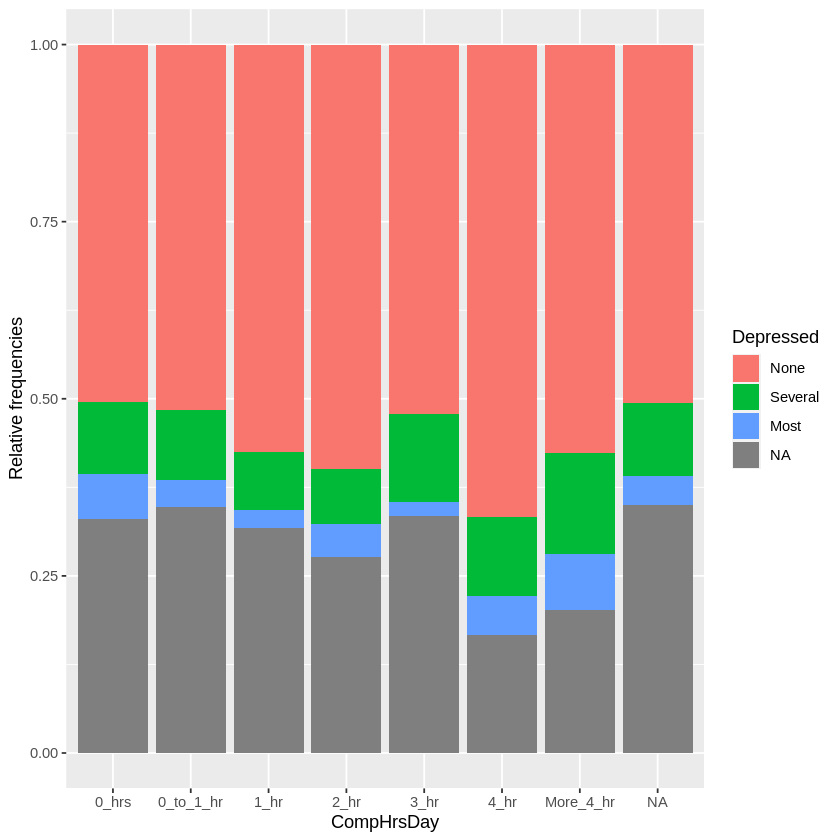

In [ ]:
ggplot(NHANES, aes(x = CompHrsDay, fill = Depressed)) + 
  geom_bar(position = "fill") +
  ylab("Relative frequencies")
  #facet_wrap(~Gender)

Думаю, можно взять колонку More_4_hr и 0_hrs, и значения в колонке depressed – most и several

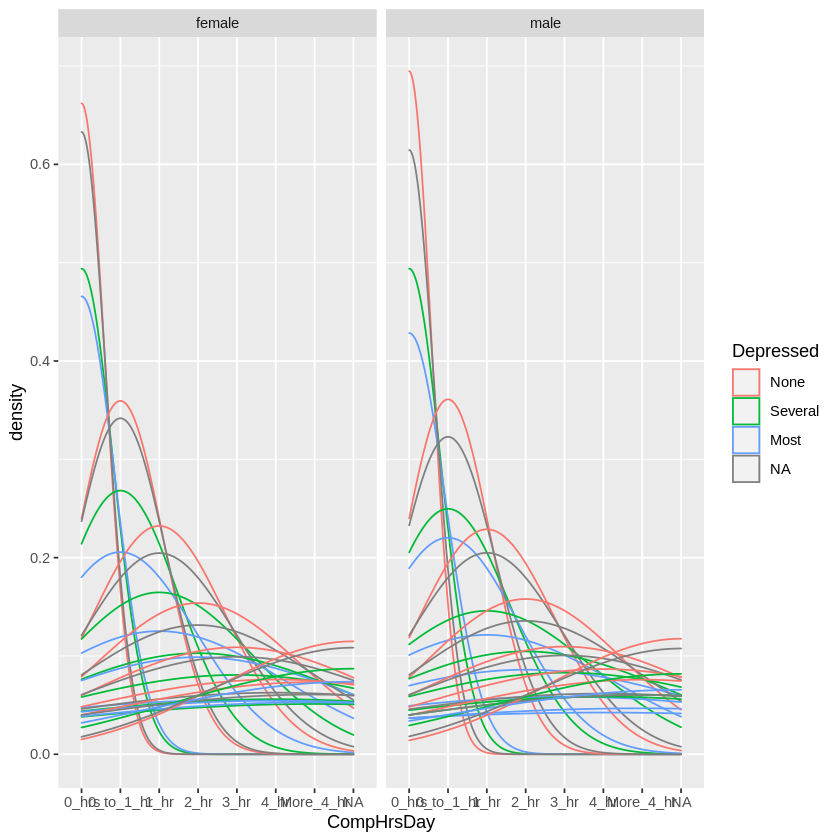

In [ ]:
ggplot(NHANES, aes(x = CompHrsDay, color = Depressed)) + 
  geom_density(adjust = 2) +
  facet_wrap(~ Gender) 

Выглядит так, что депрессия не значительно зависит от пола, при этом люди 4 и больше часа проводящие за компьютером и правда много страдают, но плотность высокая не только в случае больше чем 4х часов, в том числе и с людьми, которые вообще не сидят за компьютером, только опросы проходят для датасетов:)

Для подтверждения или опровержения нашей гипотезы – отфильтруем данные


In [ ]:
#в колонке с депрессией и комп часами выберем только Most и Several, а в часах компьютера уберем неопределенность
depression <-  NHANES %>%
  select(CompHrsDay, Depressed) %>%
  filter(Depressed%in% c('Most', 'None')) %>%
  filter(CompHrsDay%in% c('0_hrs', '0_to_1_hr','1_hr','2_hr','3_hr','4_hr', 'More_4_hr'))

In [ ]:
#Посчитаем долю с сильной депрессией для каждой категории часов
diff_orig <- depression %>%   
  # сгруппируем по часам
  group_by(CompHrsDay) %>%
  # вычислим сами доли
  summarize(prop_depr = mean(Depressed=="Most"), prop_not_depr=mean(Depressed=="None"))
diff_orig  

CompHrsDay,prop_depr,prop_not_depr
<fct>,<dbl>,<dbl>
0_hrs,0.11165846,0.8883415
0_to_1_hr,0.06803594,0.9319641
1_hr,0.04207120,0.9579288
2_hr,0.07105263,0.9289474
3_hr,0.03723404,0.9627660
4_hr,0.07692308,0.9230769
More_4_hr,0.12048193,0.8795181


Интересно, по пропорциям 4+ часов включительно действительно похожи на лидеров по меланхолии. При этом возможно 0 часов также справедливо для людей, которые не могут позволить себе компьютер и могут быть отброшены колонкой poverty, например.. 

In [ ]:
depression_bred <-  NHANES %>%
  select(CompHrsDay, Depressed) %>%
  filter(Depressed%in% c('Most', 'None')) %>%
  filter(CompHrsDay%in% c('1_hr','More_4_hr'))

In [ ]:
diff_orig_bred <- depression_bred %>%   
  # сгруппируем по часам
  group_by(CompHrsDay) %>%
  # вычислим сами доли
  summarize(prop_depr = mean(Depressed=="Most")+mean(Depressed=="Several"))
diff_orig_bred  

CompHrsDay,prop_depr
<fct>,<dbl>
1_hr,0.0420712
More_4_hr,0.1204819


In [ ]:
diff_orig_bred <- diff_orig_bred %>%  
  summarize(obs_diff_prop = diff(prop_depr)) 
diff_orig_bred

obs_diff_prop
<dbl>
0.07841073


In [ ]:
#попробуем перемешать выборку 100 раз
depr_perm <- depression_bred  %>%
  specify(Depressed ~CompHrsDay, success = "Most")%>%
  hypothesize(null="independence")%>%
  generate(reps=100, type="permute")%>%
  calculate(stat="diff in props", order=c("1_hr", "More_4_hr"))

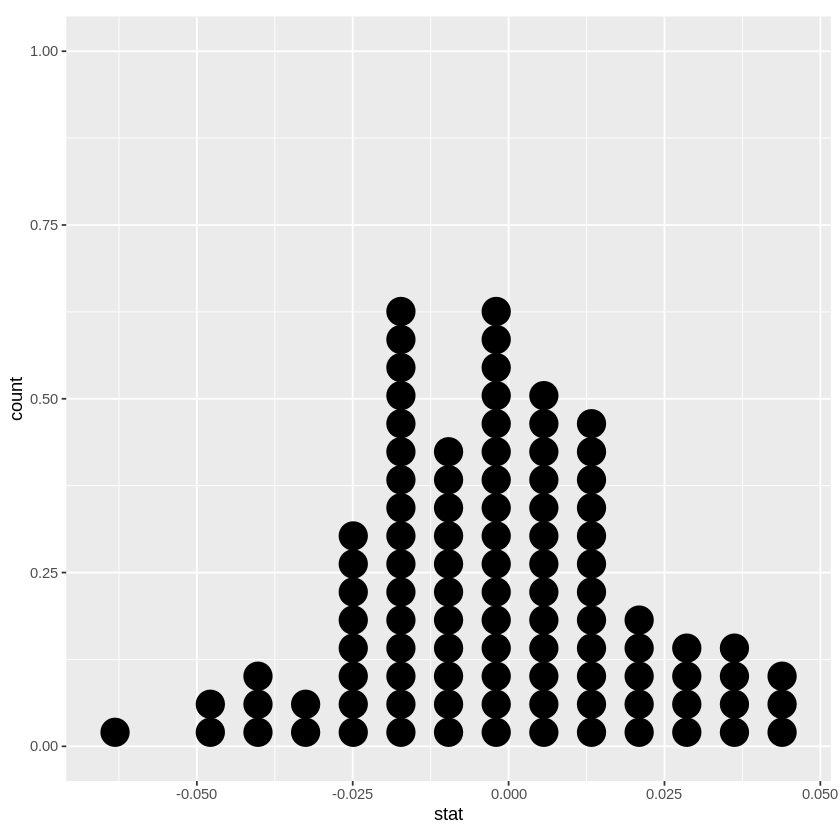

In [ ]:
ggplot(depr_perm, aes(x = stat)) + 
  geom_dotplot(binwidth = 0.0045)+
  theme(aspect.ratio = 1)

In [ ]:
# Делаем 1000 итераций
depr_perm <- depression_bred %>%
  specify(Depressed ~CompHrsDay, success = "Most") %>%
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in props", order = c("1_hr", "More_4_hr"))

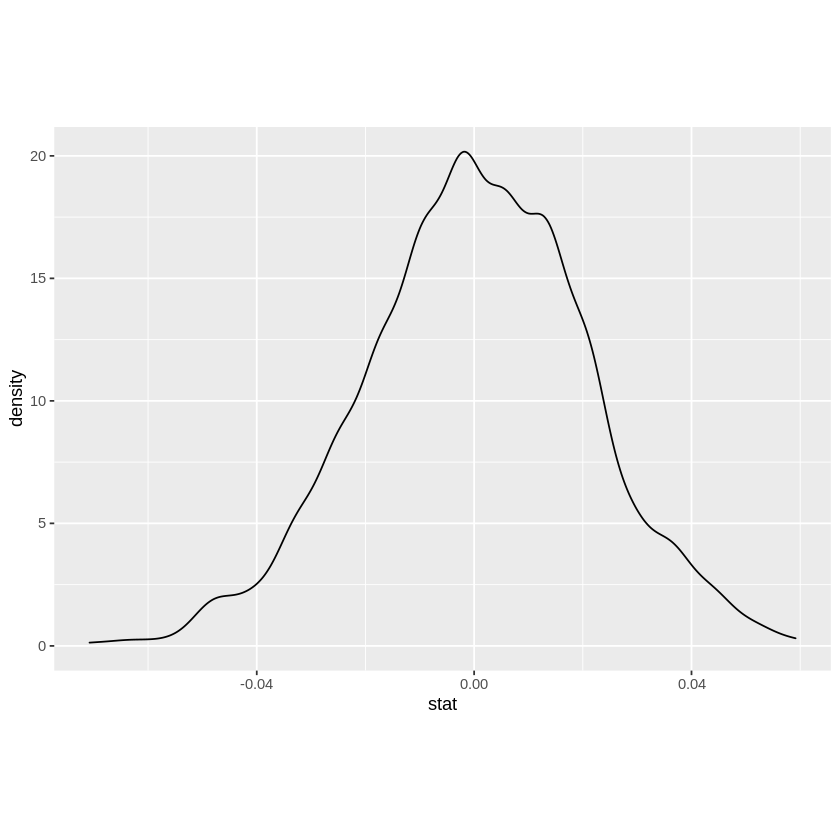

In [ ]:
ggplot(depr_perm, aes(x = stat)) + 
  geom_density()+
  theme(aspect.ratio = 0.7)

In [ ]:
colnames(depr_perm)[colnames(depr_perm) == 'stat'] <- 'diff_perm'
depr_perm$diff_orig_bred = rep(diff_orig_bred$obs_diff_prop, 1000)

n_perm_le_obs
<int>
1000


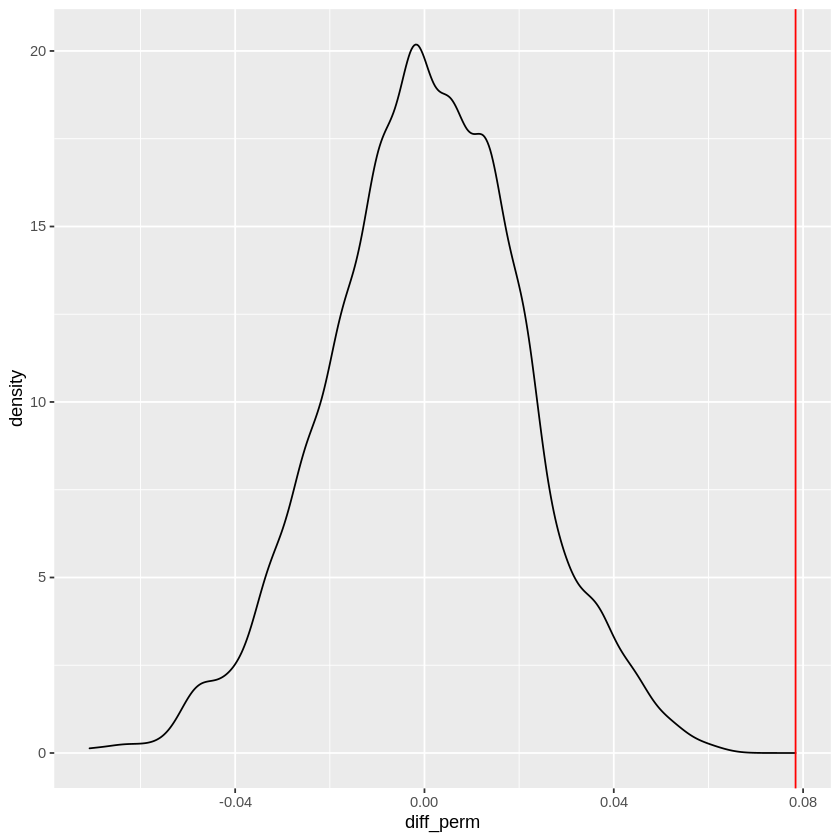

In [ ]:
#Теперь сравним получившуюся статистику с изначальной и посмотрим на их разницу
ggplot(depr_perm, aes(x = diff_perm)) + 
  geom_density() +
  # Добавим вертикальную линию соответствующую нашей тестовой статистике
  geom_vline(aes(xintercept = diff_orig_bred), color = "red") 
# Посмотрим сколько случае меньше или такие же как и тестовая статистика
depr_perm %>%
  summarize(n_perm_le_obs = sum(diff_perm <= diff_orig_bred))

выходит, что большинство значений меньше нашей тестовой статистики. Вероятно, на состояние депрессии не сильно влияет бесконтрольное сидение за компьютером

Повторите анализ для двух оставшихся датасетов
Что можно сказать о влиянии размера выборки?

In [ ]:
big_discr <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/538/datasets/f03da8fc4a2ae50a3ddf775324f4df90c96f7f26/disc_big.rds")))
new_discr <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/538/datasets/60566129b391ef827ea9c8a9846608dee24ce34a/disc_new.rds"))) 

In [ ]:
str(big_discr)

'data.frame':	480 obs. of  2 variables:
 $ promote: Factor w/ 2 levels "not_promoted",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ sex    : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...


In [ ]:
str(new_discr)

'data.frame':	48 obs. of  2 variables:
 $ promote: Factor w/ 2 levels "not_promoted",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ sex    : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...


In [ ]:
#для начала возьмем большой датасет и посмотрим статистику опрошенных сгруппированную по полу
big_discr %>%
  count(sex,promote)

sex,promote,n
<fct>,<fct>,<int>
female,not_promoted,100
female,promoted,140
male,not_promoted,30
male,promoted,210


In [ ]:
#сейчас нам важна доля одобрений, посчитаем ее
big_discr %>%
  group_by(sex)%>%
  summarize(promoted_prop = mean(promote == "promoted"))

sex,promoted_prop
<fct>,<dbl>
female,0.5833333
male,0.8750000


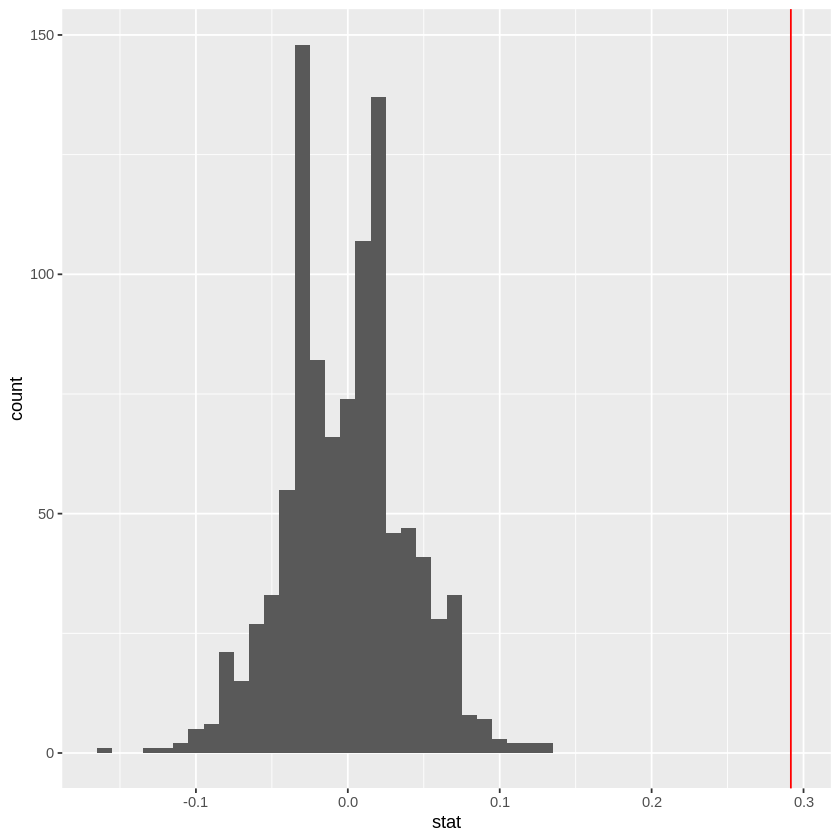

In [ ]:
#перемешиваем данные
disc_perm <- big_discr %>%
  specify(promote ~ sex, success = "promoted") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = "diff in props", order = c("male", "female"))
  
# Рисуем график
ggplot(disc_perm, aes(x = stat)) + 
  geom_histogram(binwidth = 0.01) +
  geom_vline(aes(xintercept = diff_orig), color = "red")

In [ ]:
#разность средних
diff_orig <- big_discr %>%
  group_by(sex) %>%
  summarize(prop_prom = mean(promote == "promoted")) %>%
  summarize(stat = diff(prop_prom)) %>% 
  pull()
    
diff_orig

[1] 0.2916667

Вывод: при большом размере выборки у нас уже меньше оснований утверждать, что дискриминация существует, разница средних при повторных перемешиваниях крайне незначительна

In [ ]:
#на маленькой выборке из 48 людей ситуация с перемешиванием выглядит так
new_discr %>%
  count(sex,promote)

sex,promote,n
<fct>,<fct>,<int>
female,not_promoted,7
female,promoted,17
male,not_promoted,6
male,promoted,18


In [ ]:
new_discr %>%
  group_by(sex)%>%
  summarize(promoted_prop = mean(promote == "promoted"))

sex,promoted_prop
<fct>,<dbl>
female,0.7083333
male,0.7500000


In [ ]:
new_diff_orig <- new_discr %>%
  group_by(sex) %>%
  summarize(prop_prom = mean(promote == "promoted")) %>%
  summarize(stat = diff(prop_prom)) %>% 
  pull()
    
new_diff_orig

[1] 0.04166667

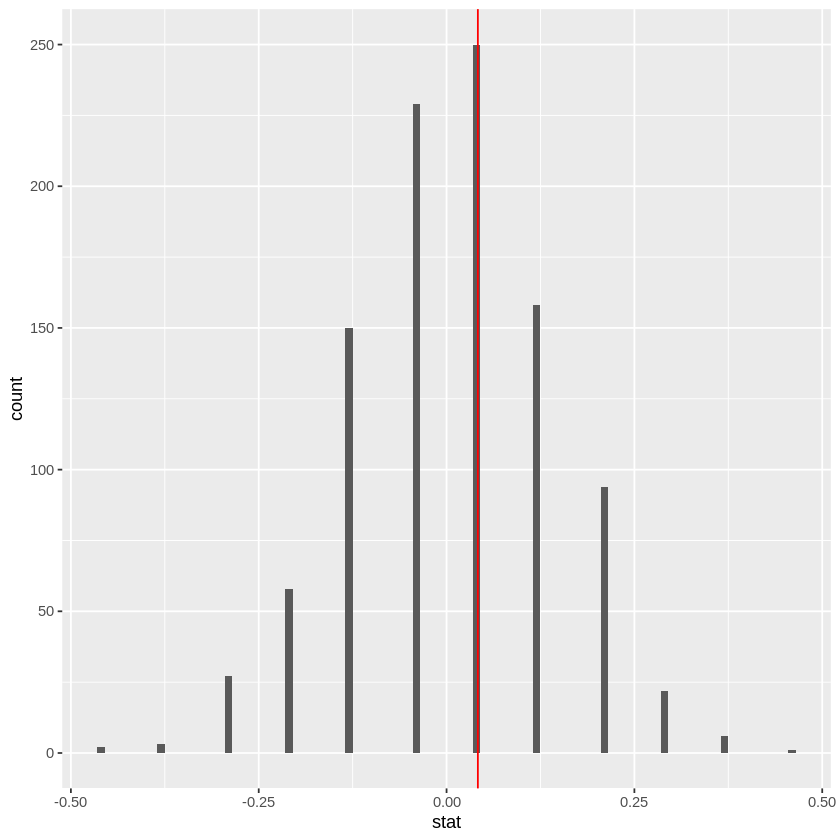

In [ ]:
#перемешиваем данные
new_disc_perm <- new_discr %>%
  specify(promote ~ sex, success = "promoted") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = "diff in props", order = c("male", "female"))
  
# Рисуем график
ggplot(new_disc_perm, aes(x = stat)) + 
  geom_histogram(binwidth = 0.01) +
  geom_vline(aes(xintercept = new_diff_orig), color = "red")

Warning message:
“`visualize()` should no longer be used to plot a p-value. Arguments `obs_stat`, `obs_stat_color`, `pvalue_fill`, and `direction` are deprecated. Use `shade_p_value()` instead.”


p_value
<dbl>
0.531


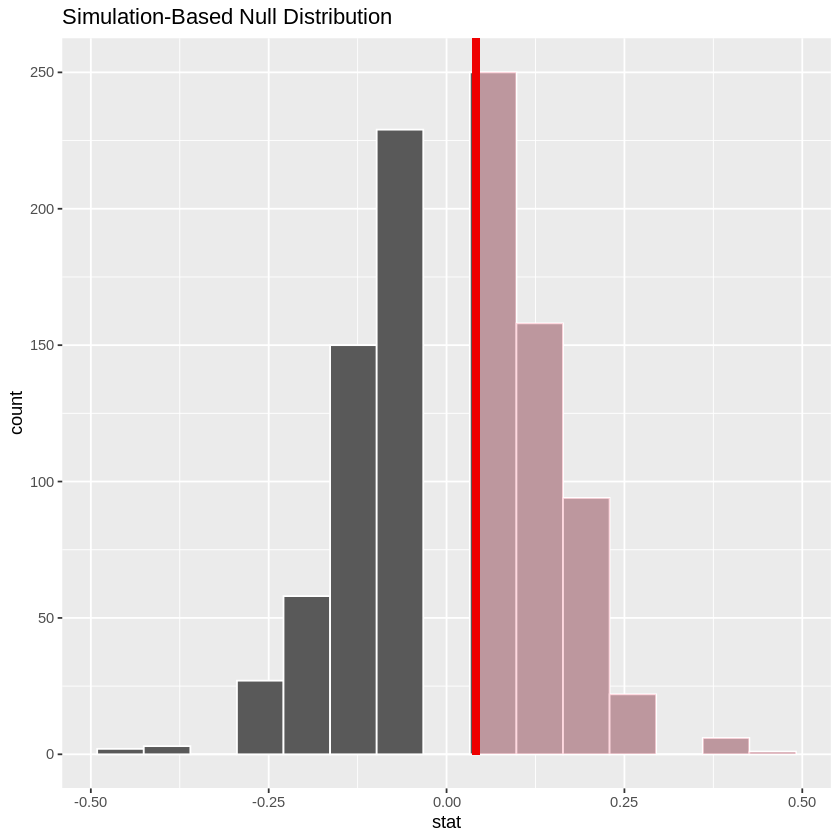

In [ ]:
new_disc_perm %>%
  visualize(obs_stat = new_diff_orig, direction = "greater")

new_disc_perm %>%
  get_p_value(obs_stat = new_diff_orig, direction = "greater")

а в данной ситуации можно говорить о том, что вероятность получить такую же разницу средних очень высока. 